In [1]:
import pymaid

rm = pymaid.CatmaidInstance('server_url', 'http_user', 'http_pw', 'token')

INFO  : Global CATMAID instance set. (pymaid)


In [2]:
pns = pymaid.get_skids_by_annotation('glomerulus DA1 right excitatory')

cn_table = pymaid.get_partners(pns)
cn_table.head()

INFO  : Found 8 neurons with matching annotation(s) (pymaid)
INFO  : Fetching connectivity table for 8 neurons (pymaid)
INFO  : Done. Found 95 pre-, 588 postsynaptic and 0 gap junction-connected neurons (pymaid)


,neuron_name,skeleton_id,num_nodes,relation,2863104,57381,61221,57353,57323,755022,27295,57311,total
0,AV4 [LH.R] 1803749 CH RJVR Vegito - check,1803748,6322,upstream,10,3,8,4,21,17,7,8,78.0
1,AV4b1#1 1853423 Accursed RJVR - check FML,1853423,10253,upstream,7,6,6,4,12,18,6,8,67.0
2,AV4 [LH.R] 1095415 ARH RJVR Static,1095414,3949,upstream,5,2,9,1,9,16,12,9,63.0
3,AV4 [LH.R] 1911125 FML PS RJVR,1911124,4327,upstream,7,0,4,2,4,4,7,3,31.0
4,AV4 [LH.R] 1812366 PS DA1 downstream,1812365,2839,upstream,2,1,1,1,5,8,2,2,22.0


In [3]:
downstream_only = cn_table[cn_table.relation == 'downstream']

strong_only = cn_table[cn_table.total >= 10]

large_only = cn_table[cn_table.num_nodes >= 2000]

connected_to_all = cn_table[cn_table[['755022', '2863104', '27295', '61221', '57353', '57323', '57381', '57311']].min(axis=1) != 0]

In [4]:
adj_mat = pymaid.adjacency_matrix(pns, downstream_only[downstream_only.total >= 10])
adj_mat.head()

INFO  : Retrieving and filtering connectivity... (pymaid)
INFO  : Finished! (pymaid)


target_skid,1811442,1870230,1803748,488055,1853423,6762450,1812558,1095414,1911124,1796364,...,515071,60445,1804938,4205169,1803929,9271871,424553,55153,3828811,1415926
source_skid,,,,,,,,,,,,,,,,,,,,,
2863104,27.0,5.0,15.0,15.0,11.0,18.0,6.0,8.0,15.0,0.0,...,0.0,2.0,0.0,10.0,2.0,0.0,0.0,10.0,0.0,0.0
57381,4.0,28.0,7.0,0.0,3.0,0.0,3.0,1.0,2.0,36.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61221,23.0,7.0,13.0,15.0,15.0,4.0,4.0,16.0,12.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
57353,2.0,23.0,3.0,3.0,5.0,4.0,5.0,4.0,2.0,0.0,...,0.0,5.0,0.0,0.0,1.0,10.0,10.0,0.0,10.0,0.0
57323,20.0,7.0,22.0,11.0,19.0,15.0,18.0,9.0,10.0,26.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


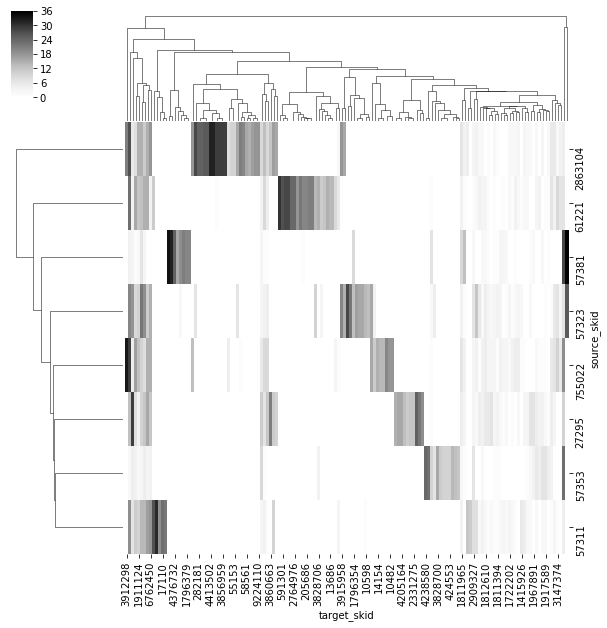

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = sns.clustermap(adj_mat,
                    cmap='Greys')

plt.show()

In [6]:
import networkx as nx

# Turn the adjacency matrix into a networkX Graph
g = pymaid.network2nx(adj_mat)

# As example: get the degree centrality for each node
dc = nx.degree_centrality(g)
print('Node centrality for some of the nodes in the network: ', dc['755022'], dc['2863104'], dc['27295'])

Node centrality for some of the nodes in the network:  0.3548387096774194 0.4258064516129032 0.3419354838709677


In [7]:
nx.write_graphml(g, 'graph.graphml')